In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import smt,mcmc

In [ ]:
south_head = pd.read_csv("south_head.csv")
south_head

In [3]:
#number of varibles
num_vars = 19*2 # where does this number come from?

x = [Int(f'x{i}') for i in range(num_vars)]

numpy_data = south_head.to_numpy()[:,1:]
s = Solver()

for i in range(28):
    s.add(x[i]>=0)
    
for i in range(19):
    s.add(x[i] <= numpy_data[0,i]+2)
    if(numpy_data[0,i]>0):
        s.add(numpy_data[0,i]-2 <= x[i])
            
    s.add(x[i+19] <= numpy_data[1,i]+2)
    if(numpy_data[1,i]>0):
        s.add(numpy_data[1,i]-2 <= x[i+19])
        
    s.add(x[i+19] + x[i] <= numpy_data[2,i]+2)
    if(numpy_data[2,i]>0):
        s.add(numpy_data[2,i]-2 <= x[i+19]+x[i])

In [5]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='megasampler', z3_problem=s)

Parsing input file: megasampler_input/z3_problem.smt2
Number of formulas in file: 131
-------------FORMULA STATISTICS-------------
Arrays 0
Bit-vectors 0
Bools 0
Bits 0
Uninterpreted functions 0
Ints 38
Reals 0
Formula tree depth 2
--------------------------------------------
starting MeGASampler


Formula is satisfiable
---------SOLVING STATISTICS--------
do_epoch time: 2.26876
epoch time: 2.27342
grow_seed time: 0.00230995
initial_solving time: 0.00440829
output time: 0.0130095
start_epoch time: 0.0091919
total time: 2.89031
Epochs: 2
MAX-SMT calls: 3
SMT calls: 0
Assignments considered (with repetitions): 10000
Models (with repetitions): 10000
Unique models (# samples in file): 10000
-----------------------------------


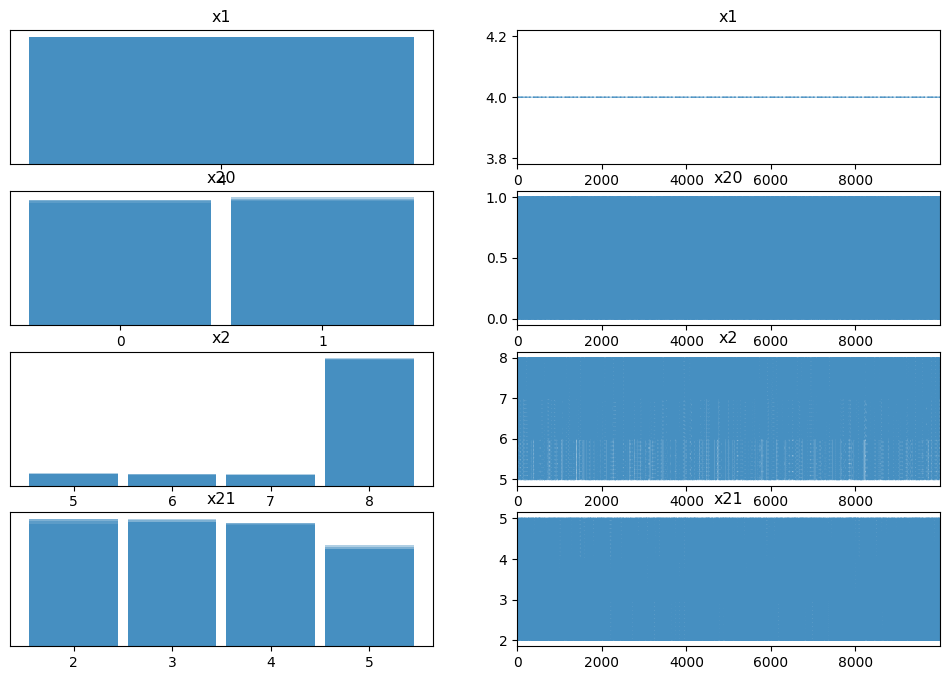

In [6]:
# Plot the posterior
import matplotlib.pyplot as plt
az.plot_trace(trace, var_names=['x1', 'x20', 'x2', 'x21']);
plt.savefig('megasampler_trace_plot.png', dpi=150);

In [7]:
# Diagnostics
az.summary(trace)

/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/pardo/programs/miniconda3/envs/mcmc+sat/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,40000.0,40000.0,NaN
x1,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,40000.0,40000.0,NaN
x2,7.574000e+00,9.080000e-01,5.000000e+00,8.000000e+00,5.000000e-03,3.000000e-03,40407.0,40000.0,1.0
x3,1.050200e+01,5.000000e-01,1.000000e+01,1.100000e+01,2.000000e-03,2.000000e-03,40725.0,40000.0,1.0
x4,9.449000e+00,1.090000e+00,8.000000e+00,1.100000e+01,5.000000e-03,4.000000e-03,39195.0,39736.0,1.0
x5,4.496000e+00,5.000000e-01,4.000000e+00,5.000000e+00,3.000000e-03,2.000000e-03,39809.0,39809.0,1.0
x6,7.499000e+00,5.000000e-01,7.000000e+00,8.000000e+00,3.000000e-03,2.000000e-03,39188.0,39188.0,1.0
x7,9.207000e+00,9.090000e-01,8.000000e+00,1.100000e+01,5.000000e-03,3.000000e-03,40150.0,39835.0,1.0
x8,6.997000e+00,8.150000e-01,6.000000e+00,8.000000e+00,4.000000e-03,3.000000e-03,40609.0,40000.0,1.0
x9,7.000000e+00,8.110000e-01,6.000000e+00,8.000000e+00,4.000000e-03,3.000000e-03,39693.0,39166.0,1.0
